In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Here we have customer data from telecom company

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.iloc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

As we can see TotalCharges column is numerical, but its type is object. Let's convert to numeric type

In [6]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda t: pd.NA if t == ' ' else float(t))

In [7]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = list(set(df.columns) - set(numerical_columns))

In [8]:
pd.isna(df).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that only TotalCharges column contains NA values, but compared to amount of rows, it is very small. Let's remove that rows.

In [9]:
df = df[~pd.isna(df['TotalCharges'])]

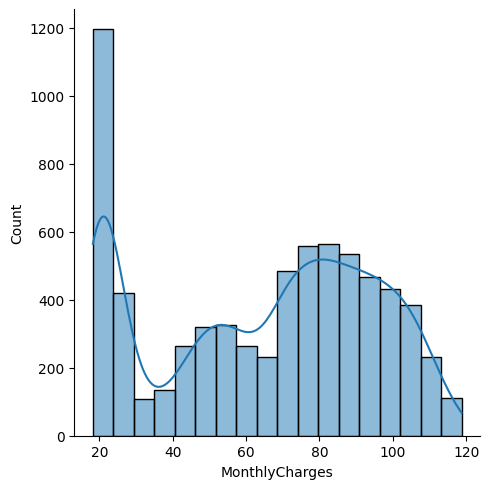

In [10]:
# Let's have a look on monthly charges and total charges
sns.displot(df['MonthlyCharges'], kde=True)
plt.show()

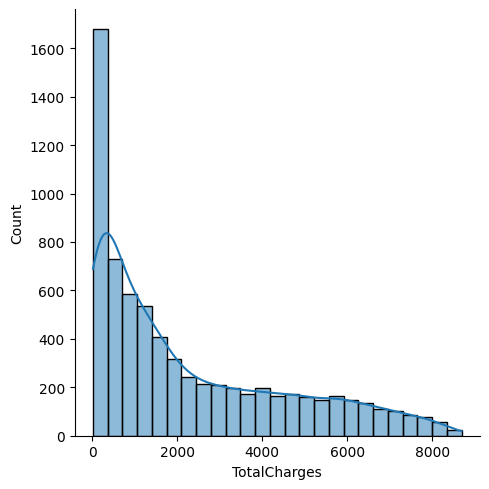

In [11]:
sns.displot(df['TotalCharges'], kde=True)
plt.show()

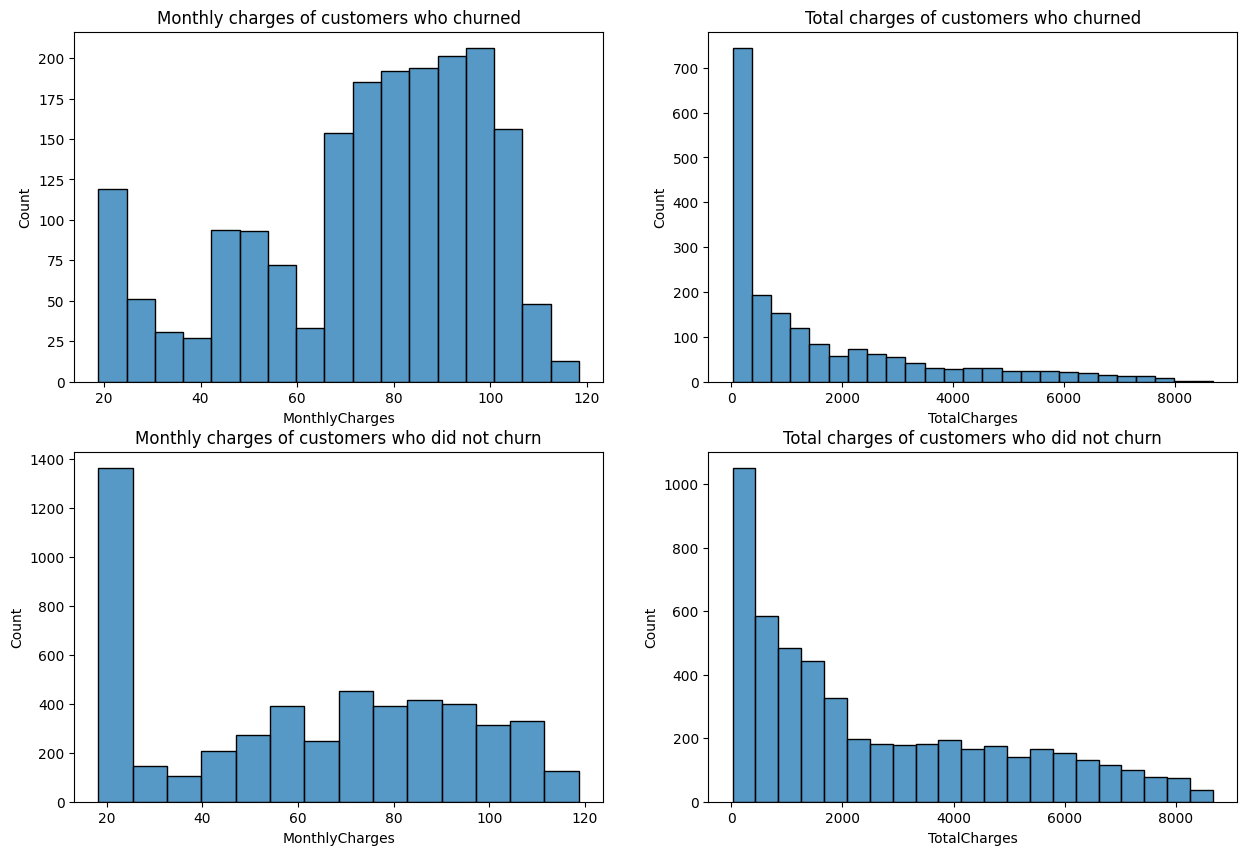

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].set_title('Monthly charges of customers who churned')
sns.histplot(ax=axes[0, 0], x=df[df['Churn'] == 'Yes']['MonthlyCharges'])

axes[0, 1].set_title('Total charges of customers who churned')
sns.histplot(ax=axes[0, 1], x=df[df['Churn'] == 'Yes']['TotalCharges'])

axes[1, 0].set_title('Monthly charges of customers who did not churn')
sns.histplot(ax=axes[1, 0], x=df[df['Churn'] == 'No']['MonthlyCharges'])

axes[1, 1].set_title('Total charges of customers who did not churn')
sns.histplot(ax=axes[1, 1], x=df[df['Churn'] == 'No']['TotalCharges'])

plt.show()

As we can see there is not exact gap between charges of customers who churned and did not churne. But one fact that we can say is that customers who churned on the mean have less charges than customers who did not churn.

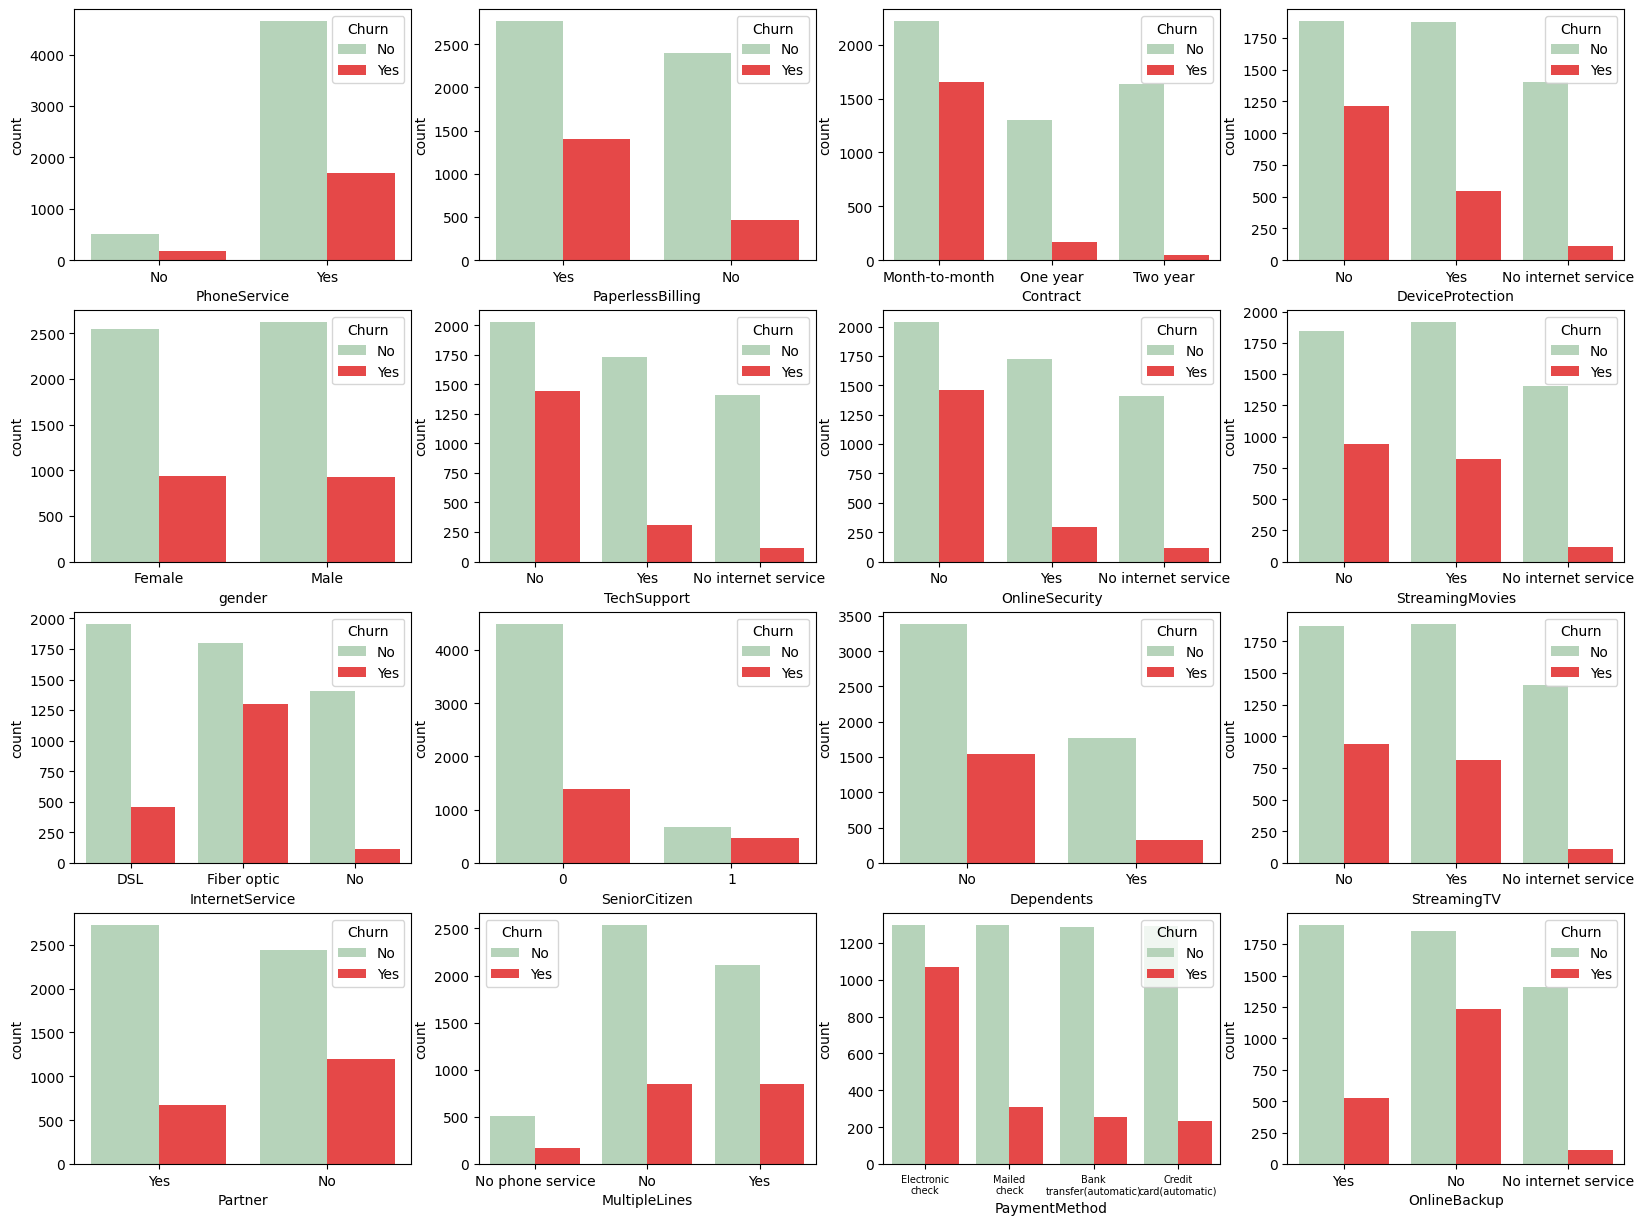

In [58]:
cat_to_plot = list(set(categorical_columns) - set(['Churn', 'customerID'])) 

fig, axes = plt.subplots(4, 4, figsize=(20, 15))

for i, c in enumerate(cat_to_plot):
    _ax = axes[i//4, i%4]
    sns.countplot(ax=_ax, data=df, x=c, hue='Churn', palette=['#B1D8B7',"#FF2E2E"])
    if c == 'PaymentMethod':
        labels = [item.get_text() for item in _ax.get_xticklabels()]
        for i in range(len(labels)):
            splitted = labels[i].split(' ')
            labels[i] = splitted[0] + '\n'
            
            for m in splitted[1:]:
                labels[i] += m
            
        _ax.set_xticklabels(labels)
        
        for tick in _ax.get_xticklabels():
            tick.set_fontsize(7)
plt.show()

There are interesting results in some plots.
* From plot where it is shown whether customer has online security or not, we can conclude that more customers churn who do not have online securtiy.
* From device protection plot we can see that there are more churns when customers do not have device protection.
* From tech support plot, we can understand that tech support is important,because if there is not tech support it is more likely that customer churned